# MATPLOTLIB FOR VISUALIZATION

## Using Iris.csv and winemag csv

In [53]:
import pandas as pd
iris = pd.read_csv('/Users/rodrigopimenta/Jupyter_Notebook/iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width   class
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [54]:
#winemag-data-130k-v2.csv
wine_reviews = pd.read_csv('/Users/rodrigopimenta/Jupyter_Notebook/winemag-data-130k-v2.csv', index_col=0)
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Text(0, 0.5, 'sepal_width')

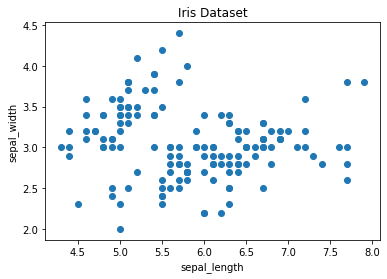

In [55]:
import matplotlib.pyplot as plt
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(iris['sepal_length'], iris['sepal_width'])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

Text(0, 0.5, 'sepal_width')

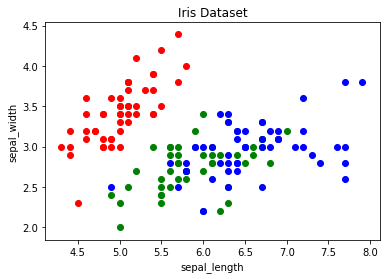

In [56]:
# create color dictionary
colors = {'Setosa':'r', 'Versicolor':'g', 'Virginica':'b'}
# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point
for i in range(len(iris['sepal_length'])):
    ax.scatter(iris['sepal_length'][i], iris['sepal_width'][i],color=colors[iris['class'][i]])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

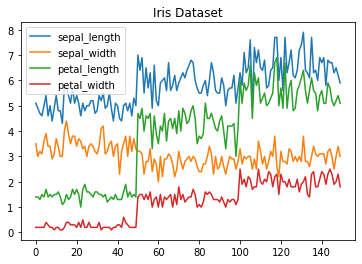

In [57]:
# get columns to plot
columns = iris.columns.drop(['class'])
# create x data
x_data = range(0, iris.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, iris[column], label=column)
# set title and legend
ax.set_title('Iris Dataset')
ax.legend()

Text(0, 0.5, 'Frequency')

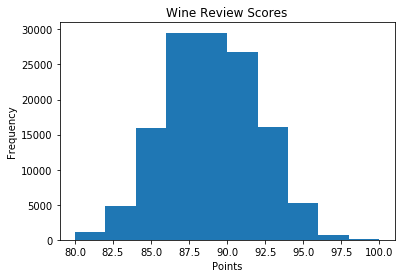

In [58]:
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(wine_reviews['points'])
# set title and labels
ax.set_title('Wine Review Scores')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

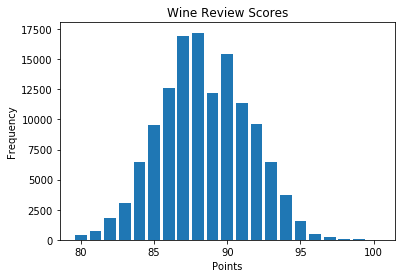

In [59]:
# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = wine_reviews['points'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('Wine Review Scores') 
ax.set_xlabel('Points') 
ax.set_ylabel('Frequency')

# PANDAS FOR VISUALIZATION

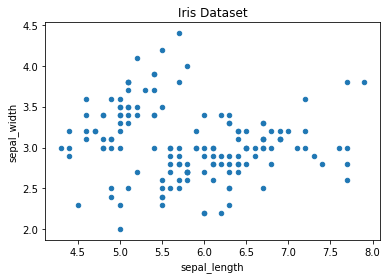

In [60]:
iris.plot.scatter(x='sepal_length', y='sepal_width', title='Iris Dataset')

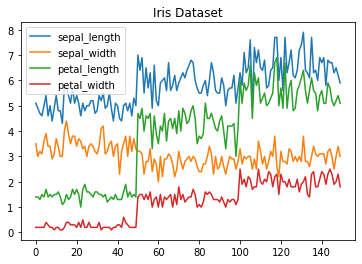

In [61]:
iris.drop(['class'], axis=1).plot.line(title='Iris Dataset')

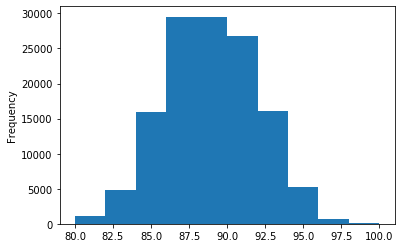

In [62]:
wine_reviews['points'].plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcea16fbbd0>,
      dtype=object)

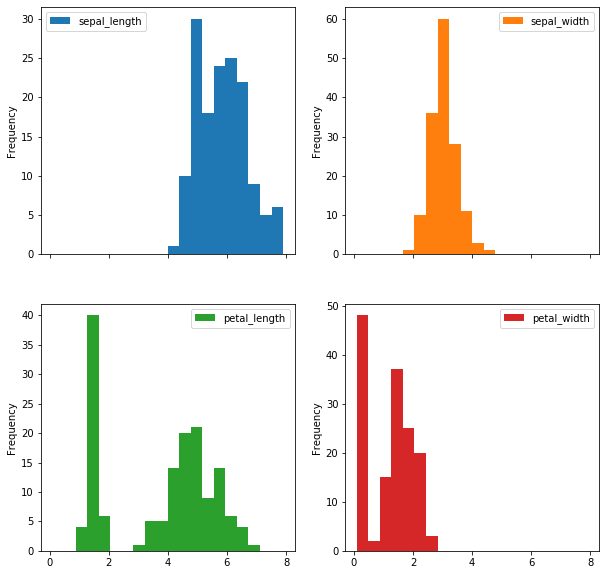

In [63]:
iris.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)

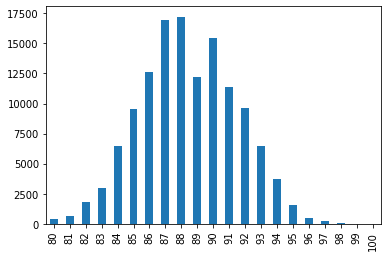

In [64]:
wine_reviews['points'].value_counts().sort_index().plot.bar()

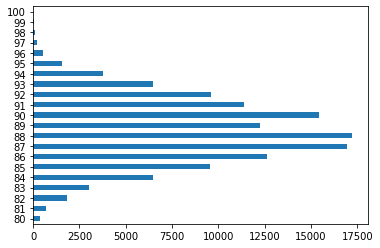

In [65]:
wine_reviews['points'].value_counts().sort_index().plot.barh()

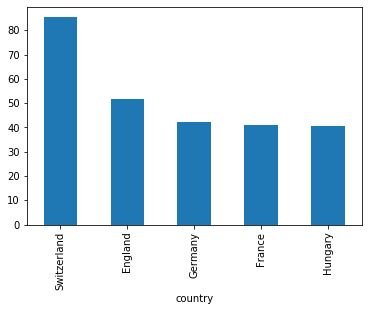

In [66]:
wine_reviews.groupby("country").price.mean().sort_values(ascending=False)[:5].plot.bar()

# SEABORN

In [67]:
import seaborn as sns
import numpy as np

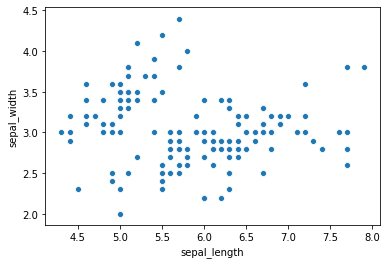

In [68]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris)

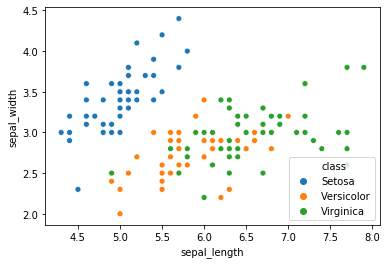

In [69]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='class', data=iris)

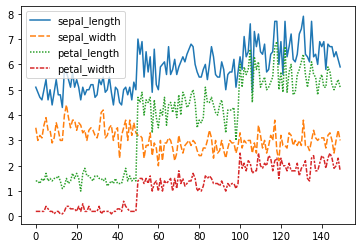

In [70]:
sns.lineplot(data=iris.drop(['class'], axis=1))

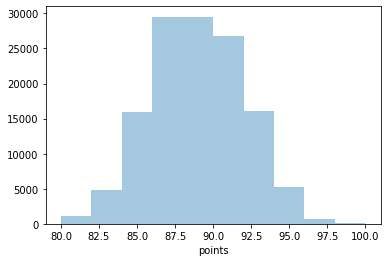

In [71]:
sns.distplot(wine_reviews['points'], bins=10, kde=False)

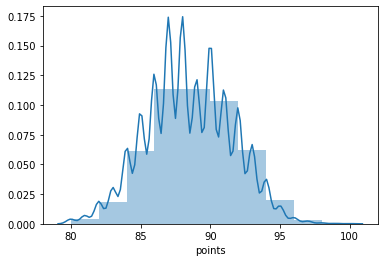

In [72]:
sns.distplot(wine_reviews['points'], bins=10, kde=True)

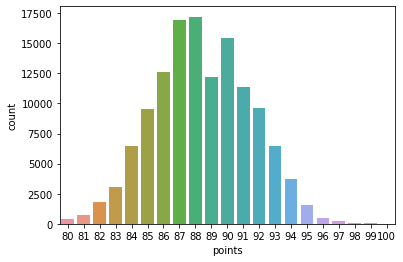

In [73]:
sns.countplot(wine_reviews['points'])

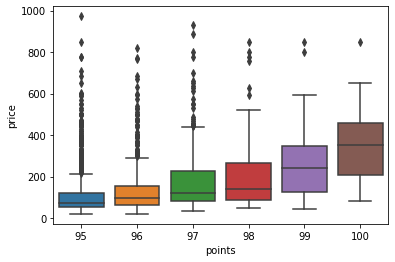

In [74]:
df = wine_reviews[(wine_reviews['points']>=95) & (wine_reviews['price']<1000)]
sns.boxplot('points', 'price', data=df)

[None, None, None, None, None, None, None, None]

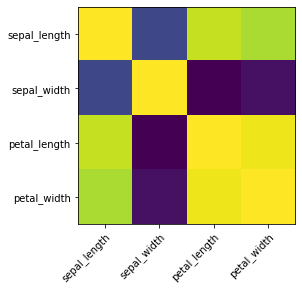

In [75]:
# get correlation matrix
corr = iris.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
rotation_mode="anchor")

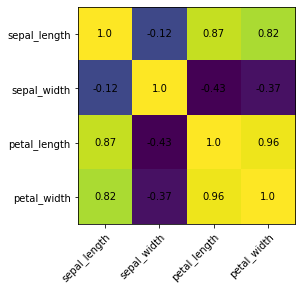

In [76]:
# get correlation matrix
corr = iris.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
ha="center", va="center", color="black")

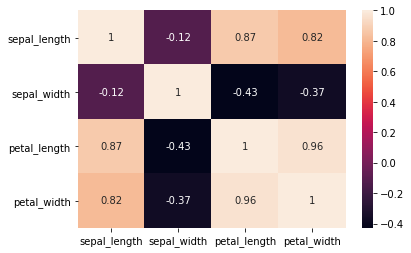

In [77]:
sns.heatmap(iris.corr(), annot=True)

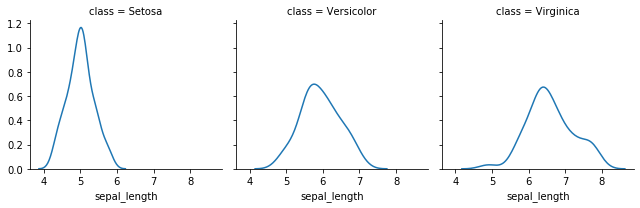

In [78]:
g = sns.FacetGrid(iris, col='class')
g = g.map(sns.kdeplot, 'sepal_length')

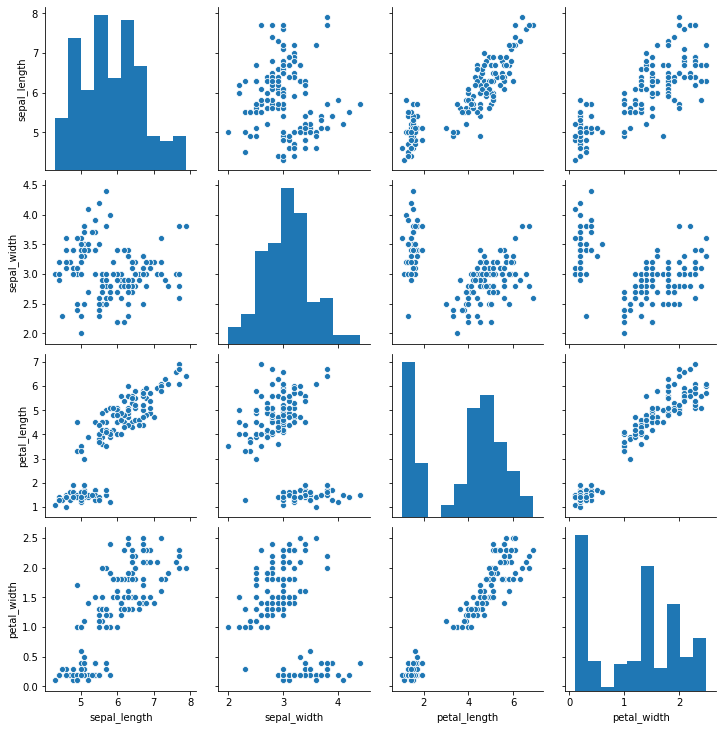

In [79]:
sns.pairplot(iris)

/Users/rodrigopimenta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcea52e1f10>,
      dtype=object)

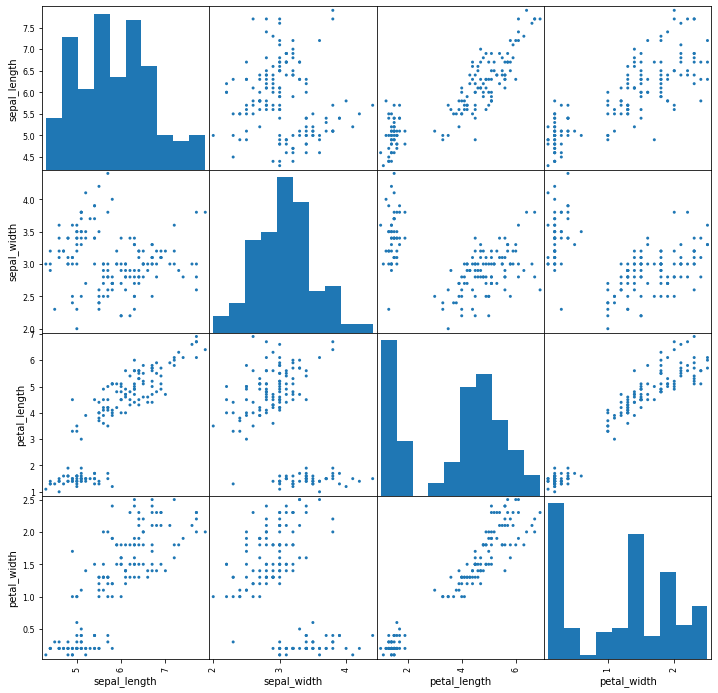

In [80]:
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(12,12))
scatter_matrix(iris, alpha=1, ax=ax)

Data visualization allows for a deeper understanding of the data by displaying it in a context that allows for trends, patterns, and correlations to be detected which might not otherwise be seen.

Matplotlib, Pandas, and Seaborn are three great graphing libraries of Python which are packed with lots of different features.